In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


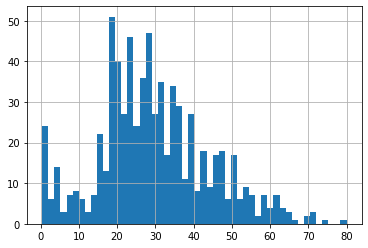

In [4]:
df['Age'].hist(bins=50)

In [6]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [9]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [25]:
df.isnull().sum().sort_values(ascending=True)

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [15]:
## COmpute the Frequency

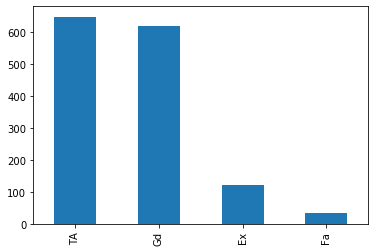

In [19]:
df['BsmtQual'].value_counts().plot.bar()

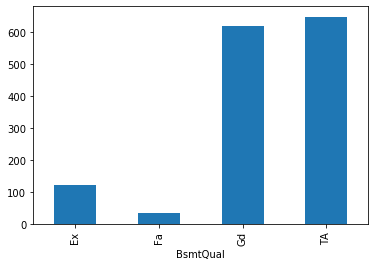

In [18]:
df.groupby('BsmtQual')['BsmtQual'].count().plot.bar()

In [23]:
### Replacing Function

def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)


In [24]:
for feature in ['BsmtQual','FireplaceQu','GarageType','SalePrice']:
    impute_nan(df,feature)

In [ ]:
### Adding variable to capture NAN

In [41]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [45]:
import numpy as np
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)


df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [46]:
frequent=df['BsmtQual'].mode()[0]

In [47]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [51]:
df.isnull().sum()

BsmtQual            0
FireplaceQu         0
GarageType         81
SalePrice           0
BsmtQual_var        0
FireplaceQu_var     0
dtype: int64

In [49]:
frequent=df['BsmtQual'].mode()[0]

In [50]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0],inplace=True)

In [53]:
df.head(1000)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,0
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
...,...,...,...,...,...,...
995,TA,Gd,Detchd,121600,0,0
996,TA,Gd,Attchd,136500,0,0
997,TA,TA,Attchd,185000,0,0
998,TA,Gd,Detchd,91000,0,0


In [54]:
 df
    

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,0
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0,0
1456,Gd,TA,Attchd,210000,0,0
1457,TA,Gd,Attchd,266500,0,0
1458,TA,Gd,Attchd,142125,0,0


#categorical Feature

## 1. One Hot encoding

In [56]:
import pandas as pd

In [63]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [64]:
df=pd.read_csv('titanic.csv',usecols=['Sex'])
df

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [67]:
pd.get_dummies(df, drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [70]:
df=pd.read_csv('titanic.csv',usecols=['Embarked'])


array(['S', 'C', 'Q', nan], dtype=object)

In [72]:
df['Embarked'].dropna(inplace=True)
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [75]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [76]:
# Mercedes

In [107]:
df=pd.read_csv('mercedes.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [108]:
df.isnull().mean()

X0    0.0
X1    0.0
X2    0.0
X3    0.0
X4    0.0
X5    0.0
X6    0.0
dtype: float64

In [109]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [110]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [111]:
lst_10=df.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)


In [112]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [113]:
import numpy as np


for i in lst_10:
    df[i]=np.where(df['X1']==i,1,0)


In [114]:
df[['X1'] + lst_10]

,X1,aa,s,b,l,v,r,i,a,c,o
0,v,0,0,0,0,1,0,0,0,0,0
1,t,0,0,0,0,0,0,0,0,0,0
2,w,0,0,0,0,0,0,0,0,0,0
3,t,0,0,0,0,0,0,0,0,0,0
4,v,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4204,s,0,1,0,0,0,0,0,0,0,0
4205,o,0,0,0,0,0,0,0,0,0,1
4206,v,0,0,0,0,1,0,0,0,0,0
4207,r,0,0,0,0,0,1,0,0,0,0


In [117]:
import datetime

In [118]:
today_date=datetime.datetime.today()

In [119]:
today_date-datetime.timedelta(1)

datetime.datetime(2021, 8, 19, 0, 5, 0, 693980)

In [123]:
[today_date-datetime.timedelta(i) for i in range(0,15)]

[datetime.datetime(2021, 8, 20, 0, 5, 0, 693980),
 datetime.datetime(2021, 8, 19, 0, 5, 0, 693980),
 datetime.datetime(2021, 8, 18, 0, 5, 0, 693980),
 datetime.datetime(2021, 8, 17, 0, 5, 0, 693980),
 datetime.datetime(2021, 8, 16, 0, 5, 0, 693980),
 datetime.datetime(2021, 8, 15, 0, 5, 0, 693980),
 datetime.datetime(2021, 8, 14, 0, 5, 0, 693980),
 datetime.datetime(2021, 8, 13, 0, 5, 0, 693980),
 datetime.datetime(2021, 8, 12, 0, 5, 0, 693980),
 datetime.datetime(2021, 8, 11, 0, 5, 0, 693980),
 datetime.datetime(2021, 8, 10, 0, 5, 0, 693980),
 datetime.datetime(2021, 8, 9, 0, 5, 0, 693980),
 datetime.datetime(2021, 8, 8, 0, 5, 0, 693980),
 datetime.datetime(2021, 8, 7, 0, 5, 0, 693980),
 datetime.datetime(2021, 8, 6, 0, 5, 0, 693980)]

In [125]:
import pandas as pd

In [130]:
data=pd.DataFrame([today_date-datetime.timedelta(i) for i in range(0,15)],columns=['Day'])

In [135]:
data['weekday']=data['Day'].dt.weekday_name

In [136]:
data

,Day,weekday
0,2021-08-20 00:05:00.693980,Friday
1,2021-08-19 00:05:00.693980,Thursday
2,2021-08-18 00:05:00.693980,Wednesday
3,2021-08-17 00:05:00.693980,Tuesday
4,2021-08-16 00:05:00.693980,Monday
5,2021-08-15 00:05:00.693980,Sunday
6,2021-08-14 00:05:00.693980,Saturday
7,2021-08-13 00:05:00.693980,Friday
8,2021-08-12 00:05:00.693980,Thursday
9,2021-08-11 00:05:00.693980,Wednesday


In [139]:
dicts={
    'Monday' :1,
    'Tuesday' : 2,
    'Wednesday' : 3,
    'Thursday':4,
    'Friday':5,
    'Saturday' : 6,
    'Sunday' : 7
}

In [140]:
data['weekday_ordinal']=data['weekday'].map(dicts)

In [141]:
data

,Day,weekday,weekday_ordinal
0,2021-08-20 00:05:00.693980,Friday,5
1,2021-08-19 00:05:00.693980,Thursday,4
2,2021-08-18 00:05:00.693980,Wednesday,3
3,2021-08-17 00:05:00.693980,Tuesday,2
4,2021-08-16 00:05:00.693980,Monday,1
5,2021-08-15 00:05:00.693980,Sunday,7
6,2021-08-14 00:05:00.693980,Saturday,6
7,2021-08-13 00:05:00.693980,Friday,5
8,2021-08-12 00:05:00.693980,Thursday,4
9,2021-08-11 00:05:00.693980,Wednesday,3


In [144]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()                                                         

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [145]:
columns=[1,3,5,6,7,8,9,13]

In [146]:
train_set=train_set[columns]

In [147]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [148]:
train_set

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [151]:
for feature in train_set.columns:
    print(feature,len(train_set[feature].unique()))

Employment 9
Degree 16
Status 7
Designation 15
family_job 6
Race 5
Sex 2
Country 42
